<h3> Mock Interview Python Screening test </h3>


In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
dataframe = pd.read_csv("adult_census_data.csv")

In [2]:
#check the syntax of the column names
dataframe.columns


Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

<b> Q1. After importing the adult_census_data.csv file, please filter this to include only the following criteria: </b>
<p>

<li> State-Gov</li>
<li> Bachelors </li>
<li> Never-Married </li>
<li> Adm-Clerical </li> 
<li> Not-in-familiy </li>
<li> White </li>
<li> Male </li> 
<li> United States </li>
<li> <=50K </li> 

<b> Feel free to any method to complete this tasks. However, we recommend you use either list filtering [], or .loc to complete this task.</b>

<b> Put your code below </b>

In [3]:
subset = [' State-gov', ' Bachelors', ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' United-States', ' <=50K']
df = dataframe[subset]
df.head(3)

,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K


<b> Currently, the dataframe you are using has the following column names: </b>

[' State-gov', ' Bachelors', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' United-States', ' <=50K']
       
     
<b> Q2. Please re-name all the newly filtered columns in the pandas DataFrame to the following: </b>

Employment Type, Degree Status, Marriage-Status, Job-Role, Family-Role, Ethnicity, Gender, Country, Earnings

E.g. State-Gov becomes Employment Type, Bachelors becomes Degree Status, etc.

<b> Put your code below </b>

In [7]:
new_col ={' State-gov': 'Employment Type', ' Bachelors':'Degree Status', ' Never-married':'Marriage-Status',
          ' Adm-clerical': 'Job-Role',' Not-in-family':'Family-Role', ' White':'Ethnicity', ' Male': 'Gender', 
          ' United-States': 'Country', ' <=50K':'Earnings'}

df.rename(columns = new_col) #inplace=True argument may be required when restrarting Kernel

df.head(3)



,Employment Type,Degree Status,Marriage-Status,Job-Role,Family-Role,Ethnicity,Gender,Country,Earnings
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K


<b> Q3. The Job Role Columns holds the job information for each individual in this census snapshot. Using this column, create a Bar Chart that shows the count of 'Unique' Jobs per Job Group in the "Job-Role" Column in ascending order, as per the provided image below </b>


<b> Put your code below </b>

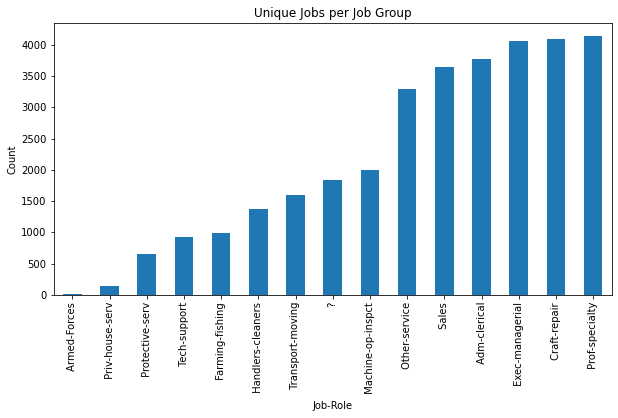

In [8]:
jobs = df.groupby('Job-Role')['Job-Role'].count().sort_values()
plt.figure(figsize = (10, 5))
jobs.plot(kind='bar')
plt.title('Unique Jobs per Job Group')
plt.ylabel('Count')
plt.show()

<b> Q4. Please create two bar plots as per below that show:
    
    1) The number of individuals who have a High School Graduate Diploma AND earn <=50K in the United States
    2) The number of individuals who have a High School Graduate Diploma AND earn >50K in the United States 

Please note you will be looking specifically at the *Job Role* column

<b> Put Your Code Below </b>

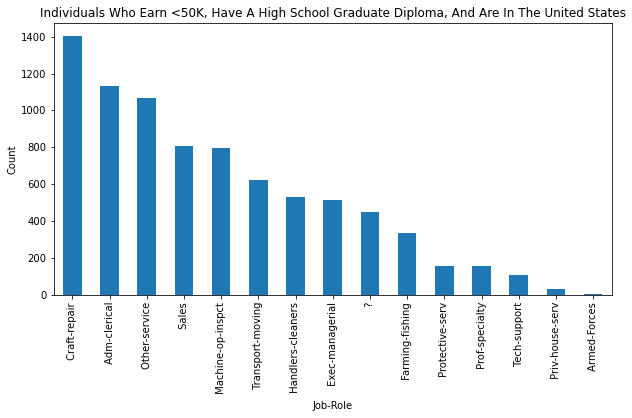

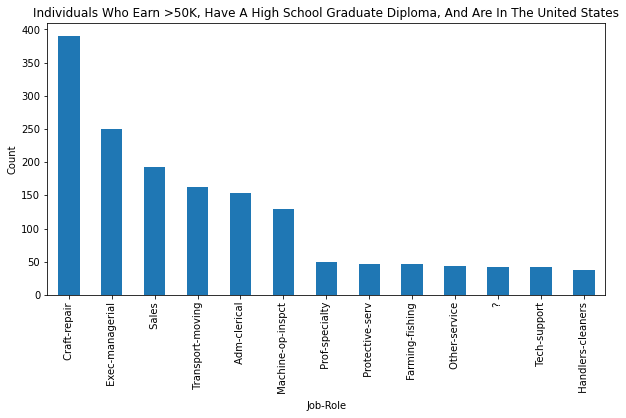

In [12]:
condition1=df[(df['Country']==' United-States')&(df['Earnings']==' <=50K')&(df['Degree Status']==' HS-grad')]
plot1= condition1.groupby('Job-Role')['Job-Role'].count().sort_values(ascending=False)

plt.figure(figsize=(10,5))

plot1.plot(kind='bar')
plt.title('Individuals Who Earn <50K, Have A High School Graduate Diploma, And Are In The United States')
plt.ylabel('Count')
plt.show()


condition2=df[(df['Country']==' United-States')&(df['Earnings']==' >50K')&(df['Degree Status']==' HS-grad')]
plot2 = condition2.groupby('Job-Role')['Job-Role'].count().sort_values(ascending=False)

plt.figure(figsize=(10,5))

plot2.plot(kind='bar')
plt.title('Individuals Who Earn >50K, Have A High School Graduate Diploma, And Are In The United States')
plt.ylabel('Count')
plt.show()

<H2> Challenge Question </H2>

<b> Q5. Which Job Role has the highest <i> proportion </i> of individuals who earn >50K? </b>

<b> Put your code below </b>

In [13]:
greater= df[df['Earnings']==' >50K'].groupby('Job-Role')['Job-Role'].count()
total =df.groupby('Job-Role')['Job-Role'].count()


proportion = greater/total
sortprop = proportion.sort_values(ascending=False)


print('The Job Role with the highest proportion of individuals who earn >50K is Exec-Managerial with a proporiton of ~', 
     round(sortprop.iloc[0],2))
print()
print(sortprop)

The Job Role with the highest proportion of individuals who earn >50K is Exec-Managerial with a proporiton of ~ 0.48

Job-Role
 Exec-managerial      0.484014
 Prof-specialty       0.449034
 Protective-serv      0.325116
 Tech-support         0.304957
 Sales                0.269315
 Craft-repair         0.226641
 Transport-moving     0.200376
 Adm-clerical         0.134518
 Machine-op-inspct    0.124875
 Farming-fishing      0.115694
 Armed-Forces         0.111111
 ?                    0.103635
 Handlers-cleaners    0.062774
 Other-service        0.041578
 Priv-house-serv      0.006711
Name: Job-Role, dtype: float64
